In [1]:
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
import numpy as np
import time
import numpy as np
from sklearn.metrics.pairwise import euclidean_distances
import random
import math

##Creating Data Points


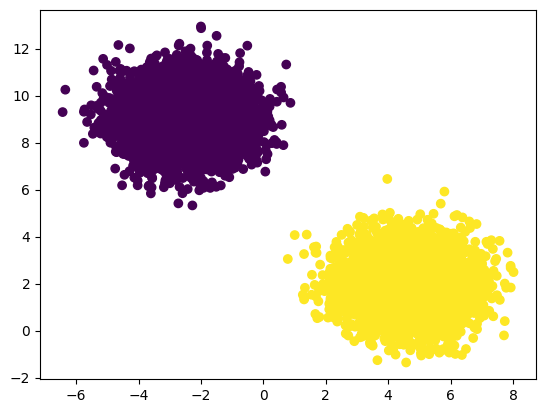

In [2]:
NUM_ITER = 200

# generate 10,000 random data points with 2 features and 2 labels
X, y = make_blobs(n_samples=10000, centers=2, n_features=2, random_state=42)
# plot the data points in a 2D scatter plot
plt.scatter(X[:, 0], X[:, 1], c=y)
plt.show()

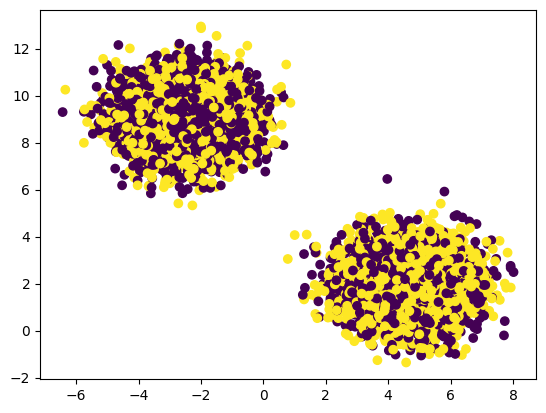

In [3]:
# set the seed for reproducibility
np.random.seed(42)

#make %90 of data points unlabeled
num_unlabeled = int(0.9 * len(y))
unlabeled_indices = np.random.choice(len(y), size=num_unlabeled, replace=False)
labeled_indices = np.array(list(set(np.array(range(len(y)))) - set(unlabeled_indices)))

#hold initially labeled then unlabeled points
initial_unlabeled_labels = np.copy(y[unlabeled_indices])

#initialize the labels of the unlabeled points with a Gaussian distribution
unlabeled_labels = np.random.choice([0, 1], size=num_unlabeled)

#clip the labels between (0,1)
unlabeled_labels = np.clip(unlabeled_labels, 0, 1)

#assign labels to selected indices
y[unlabeled_indices] = unlabeled_labels

# plot the data points in a 2D scatter plot
plt.scatter(X[:, 0], X[:, 1], c=y)
plt.show()

In [4]:
len(labeled_indices), len(unlabeled_indices)

(1000, 9000)

In [5]:
def weights_labeled_unlabeled():
    labeled_unlabeled = euclidean_distances(X[labeled_indices], X[unlabeled_indices]) / X[labeled_indices].shape[1]
    return math.e**(-10* labeled_unlabeled**2)
print("Weights labeled unlabeled calcualted")

w_labeled_unlabeled = weights_labeled_unlabeled()

def weights_unlabeled_unlabeled():
    unlabeled_unlabeled = euclidean_distances(X[unlabeled_indices], X[unlabeled_indices]) / X[unlabeled_indices].shape[1]
    return math.e**(-10* unlabeled_unlabeled**2)
print("Weights unlabeled unlabeled calcualted")

w_unlabeled_unlabeled = weights_unlabeled_unlabeled()

Weights labeled unlabeled calcualted
Weights unlabeled unlabeled calcualted


In [6]:
'''
def euclidean_distance_(point1, point2, eps=1e-6):
    return np.linalg.norm(point1 - point2) + eps

x_ = len(labeled_indices)
y_ = len(unlabeled_indices)

#initialize the weights for w_lu(labeled & unlabeled)
w_lu = np.zeros((x_,y_))

for i in range(len(labeled_indices)):
  for j in range(len(unlabeled_indices)):
    w_lu[i][j] = 1 / euclidean_distance_(X[labeled_indices[i]], X[unlabeled_indices[j]])

#initialize the weights for w_uu(unlabeled & unlabeled)
w_uu = np.zeros((y_,y_))

for i in range(len(unlabeled_indices)):
  for j in range(len(unlabeled_indices)):
    w_uu[i][j] = 1 / euclidean_distance_(X[unlabeled_indices[i]], X[unlabeled_indices[j]])

w_lu.shape'''

'\ndef euclidean_distance_(point1, point2, eps=1e-6):\n    return np.linalg.norm(point1 - point2) + eps\n\nx_ = len(labeled_indices)\ny_ = len(unlabeled_indices)\n\n#initialize the weights for w_lu(labeled & unlabeled)\nw_lu = np.zeros((x_,y_))\n\nfor i in range(len(labeled_indices)):\n  for j in range(len(unlabeled_indices)):\n    w_lu[i][j] = 1 / euclidean_distance_(X[labeled_indices[i]], X[unlabeled_indices[j]])\n\n#initialize the weights for w_uu(unlabeled & unlabeled)\nw_uu = np.zeros((y_,y_))\n\nfor i in range(len(unlabeled_indices)):\n  for j in range(len(unlabeled_indices)):\n    w_uu[i][j] = 1 / euclidean_distance_(X[unlabeled_indices[i]], X[unlabeled_indices[j]])\n\nw_lu.shape'

In [7]:
'''#normalize the weights
def normalize(array):
    min_val = np.min(array)
    max_val = np.max(array)
    return (array - min_val) / (max_val - min_val)

w_lu = normalize(w_lu)
w_uu = normalize(w_uu)'''

'#normalize the weights\ndef normalize(array):\n    min_val = np.min(array)\n    max_val = np.max(array)\n    return (array - min_val) / (max_val - min_val)\n\nw_lu = normalize(w_lu)\nw_uu = normalize(w_uu)'

##Gradient Descent

In [8]:
'''def loss(labeled, unlabeled,):

    sum1 = sum2 = 0.0
    #calcualte for first double sum 
    for i in range(len(labeled)):
        for j in range(len(unlabeled)):
            sum1 += labeled_unlabeled_loss_matrix[i][j] * (unlabeled[j] - labeled[i])**2

    #calculate for second double sum
    for i in range(len(unlabeled)):
        for j in range(len(unlabeled)):
            sum2 += unlabeled_unlabeled_loss_matrix[i][j] * (unlabeled[i] - unlabeled[j])**2

    return sum1 + sum2/2'''

'def loss(labeled, unlabeled,):\n\n    sum1 = sum2 = 0.0\n    #calcualte for first double sum \n    for i in range(len(labeled)):\n        for j in range(len(unlabeled)):\n            sum1 += labeled_unlabeled_loss_matrix[i][j] * (unlabeled[j] - labeled[i])**2\n\n    #calculate for second double sum\n    for i in range(len(unlabeled)):\n        for j in range(len(unlabeled)):\n            sum2 += unlabeled_unlabeled_loss_matrix[i][j] * (unlabeled[i] - unlabeled[j])**2\n\n    return sum1 + sum2/2'

In [9]:
def loss_fast(labeled, unlabeled):
    Y_unlabeled = np.copy(unlabeled).astype("float64").reshape((-1,1))
    Y_labeled = np.copy(labeled).astype("float64").reshape((-1,1))

    # Calculate first double sum
    Y_minus_Y_bar = Y_unlabeled-Y_labeled.T
    Y_minus_Y_bar_sq = np.power(Y_minus_Y_bar, 2)
    lu_loss = np.sum(Y_minus_Y_bar_sq * w_labeled_unlabeled.T)

    # Calculate second double sum
    Y_minus_Y = Y_unlabeled-Y_unlabeled.T
    Y_minus_Y_sq = np.power(Y_minus_Y, 2)
    ul_loss = np.sum(Y_minus_Y_sq * w_unlabeled_unlabeled.T)

    return lu_loss + ul_loss/2

In [10]:
def accuracy(y_pred, y_initial_unlabeled = initial_unlabeled_labels):
  num_correct = np.sum(np.round(y_pred) == y_initial_unlabeled)
  return num_correct / len(y_initial_unlabeled)

Gradient function is follows:
$$
\begin{align*}
\nabla_{y^j}f(y) &= 2 \sum_{i=0}^lw_{ij}(y^j - \bar{y}^i) + \sum_{i=0}^u\bar{w}_{ij}(y^j - y^i)\end{align*}
$$

In [11]:
'''def gradient(labeled, unlabeled):
    grads = []
    for i in range(len(unlabeled)):
        grad = 0
        for j in range(len(labeled)):
            grad += 2 * w_lu[j][i] * (unlabeled[i] - labeled[j])
        for j in range(len(unlabeled)):
            grad += w_uu[j][i] * (unlabeled[i] - unlabeled[j])
        grads.append(grad)
    return np.array(grads)

def gradient_fast_new_weights(labeled, unlabeled):
    grad = np.array([], dtype=float)
    for j in range(len(unlabeled)):
      total_lu = np.sum((unlabeled[j] - labeled) * w_labeled_unlabeled.T[j])
      total_uu = np.sum((unlabeled[j] - unlabeled) * w_unlabeled_unlabeled.T[j])
      grad = np.append(grad, total_lu * 2 + total_uu)
    return grad
'''

def gradient_fast_new_weights_iter(unlabeled, j):
    total_lu = np.sum((unlabeled[j] - y[labeled_indices]) * w_labeled_unlabeled.T[j])
    total_uu = np.sum((unlabeled[j] - unlabeled) * w_unlabeled_unlabeled.T[j])
    return total_lu * 2 + total_uu

In [12]:
y_unlabeled_gd = np.copy(y[unlabeled_indices]).astype(np.float64)
y_labeled_gd = np.copy(y[labeled_indices]).astype(np.float64)

In [13]:
# Initialize the estimated y and the stepsize
accuracy_list_gd = []
loss_gd = []
stepsize = 0.0001
stop_condition = False
ITERATION = 0 

while ITERATION <= NUM_ITER:
  ITERATION+=1
  stop_condition = False

  # Check the stop condition
  if (stop_condition):
    break

  # Compute objective function for estimated y
  loss_gd.append(loss_fast(y_labeled_gd, y_unlabeled_gd))
  accuracy_list_gd.append(accuracy(y_unlabeled_gd))

  for i in range(len(y_unlabeled_gd)):
      #Calculate gradient with respect to i
      grad = gradient_fast_new_weights_iter(y_unlabeled_gd, i)
        
      # Stopping condition
      if(abs(grad) < 0.00001):
        stop_condition = True

      # Update the estimated y
      y_unlabeled_gd[i] = y_unlabeled_gd[i] - 0.001 * grad
  
  print("iteration: {} --- accuracy: {:.3f} ---- loss: {:.3f}".format(ITERATION, accuracy_list_gd[-1], loss_gd[-1]))

accuracy: 0.500 ---- loss: 1122499.743
accuracy: 0.577 ---- loss: 257995.825
accuracy: 0.752 ---- loss: 125398.364
accuracy: 0.826 ---- loss: 79275.801
accuracy: 0.870 ---- loss: 56174.079
accuracy: 0.899 ---- loss: 42301.982
accuracy: 0.917 ---- loss: 33076.939
accuracy: 0.932 ---- loss: 26541.227
accuracy: 0.943 ---- loss: 21709.400
accuracy: 0.952 ---- loss: 18026.294
accuracy: 0.957 ---- loss: 15153.042
accuracy: 0.962 ---- loss: 12870.222
accuracy: 0.965 ---- loss: 11029.249
accuracy: 0.968 ---- loss: 9525.927
accuracy: 0.971 ---- loss: 8285.114
accuracy: 0.973 ---- loss: 7251.369
accuracy: 0.975 ---- loss: 6382.997
accuracy: 0.977 ---- loss: 5648.132
accuracy: 0.979 ---- loss: 5022.078
accuracy: 0.981 ---- loss: 4485.461
accuracy: 0.983 ---- loss: 4022.920
accuracy: 0.984 ---- loss: 3622.159
accuracy: 0.985 ---- loss: 3273.251
accuracy: 0.985 ---- loss: 2968.119
accuracy: 0.986 ---- loss: 2700.143
accuracy: 0.986 ---- loss: 2463.866
accuracy: 0.987 ---- loss: 2254.759
accuracy: 0

accuracy: 0.999 ---- loss: 21.852


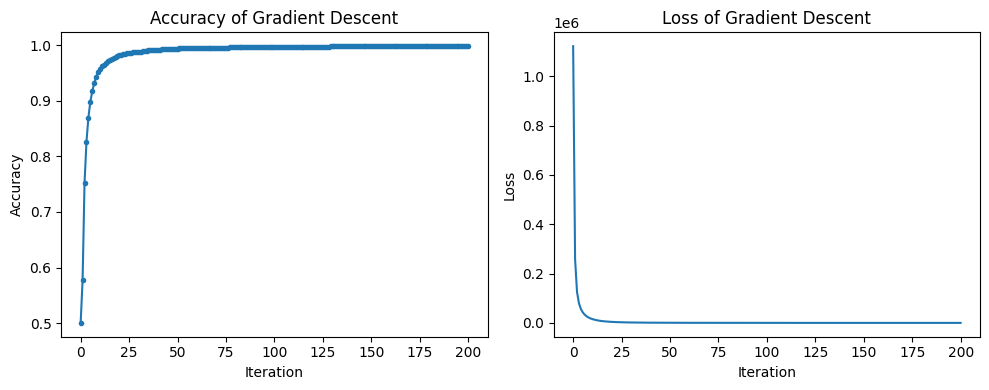

In [14]:
import matplotlib.pyplot as plt
print("accuracy: {:.3f} ---- loss: {:.3f}".format(accuracy_list_gd[-1], loss_gd[-1]))

# create a figure with two subplots
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))

# plot the first graph on the left subplot
axs[0].set_title("Accuracy of Gradient Descent")
axs[0].plot(accuracy_list_gd, marker='.')
axs[0].set_xlabel("Iteration")
axs[0].set_ylabel("Accuracy")

# plot the second graph on the right subplot
axs[1].set_title("Loss of Gradient Descent")
axs[1].plot(loss_gd)
axs[1].set_xlabel("Iteration")
axs[1].set_ylabel("Loss")

# adjust the spacing between the subplots
plt.tight_layout()

# display the plot
plt.show()


##Randomized BCGD

In [15]:
y_unlabeled_rbcgd = np.copy(y[unlabeled_indices]).astype(np.float64)
y_labeled_rbcgd = np.copy(y[labeled_indices]).astype(np.float64)

In [16]:
# Initialize the estimated y and the stepsize
accuracy_list_rbcgd = []
losses_gd = []
stepsize = 0.0001

# Initialize a vector for values of the objective function
loss_rbcgd = []

# Implementation of Randomized BCGD
stop_condition = False

ITERATION = 0 

while ITERATION <= NUM_ITER:
  ITERATION+=1
  stop_condition = False

  # Check the stop condition
  if (stop_condition):
    break

  # Compute objective function for estimated y
  loss_rbcgd.append(loss_fast(y_labeled_rbcgd, y_unlabeled_rbcgd))
  accuracy_list_rbcgd.append(accuracy(y_unlabeled_rbcgd))

  for i in range(len(y_unlabeled_rbcgd)):

      # Choosing random block
      rand_block = np.random.randint(len(y_unlabeled_rbcgd))

      #Calculate gradient with respect to i
      grad = gradient_fast_new_weights_iter(y_unlabeled_rbcgd, rand_block)
        
      # Stopping condition
      if(abs(grad) < 0.00001):
        stop_condition = True

      # Update the estimated y
      y_unlabeled_rbcgd[rand_block] = y_unlabeled_rbcgd[rand_block] - 0.001 * grad

  print("iteration: {} --- accuracy: {:.3f} ---- loss: {:.3f}".format(ITERATION, accuracy_list_rbcgd[-1], loss_rbcgd[-1]))
  

accuracy: 0.500 ---- loss: 1122499.743
accuracy: 0.594 ---- loss: 539891.774
accuracy: 0.697 ---- loss: 289157.341
accuracy: 0.777 ---- loss: 165872.233
accuracy: 0.833 ---- loss: 105302.208
accuracy: 0.872 ---- loss: 74557.326
accuracy: 0.898 ---- loss: 55596.216
accuracy: 0.915 ---- loss: 43669.116
accuracy: 0.927 ---- loss: 35892.894
accuracy: 0.938 ---- loss: 29285.882
accuracy: 0.947 ---- loss: 24289.234
accuracy: 0.953 ---- loss: 20521.332
accuracy: 0.959 ---- loss: 17613.828
accuracy: 0.965 ---- loss: 15108.701
accuracy: 0.968 ---- loss: 13149.088
accuracy: 0.970 ---- loss: 11392.094
accuracy: 0.973 ---- loss: 9967.380
accuracy: 0.975 ---- loss: 8753.461
accuracy: 0.978 ---- loss: 7732.767
accuracy: 0.979 ---- loss: 6850.417
accuracy: 0.981 ---- loss: 6084.787
accuracy: 0.982 ---- loss: 5440.295
accuracy: 0.983 ---- loss: 4867.833
accuracy: 0.984 ---- loss: 4381.288
accuracy: 0.985 ---- loss: 3953.243
accuracy: 0.986 ---- loss: 3579.955
accuracy: 0.986 ---- loss: 3238.744
accura

accuracy: 0.999 ---- loss: 23.178


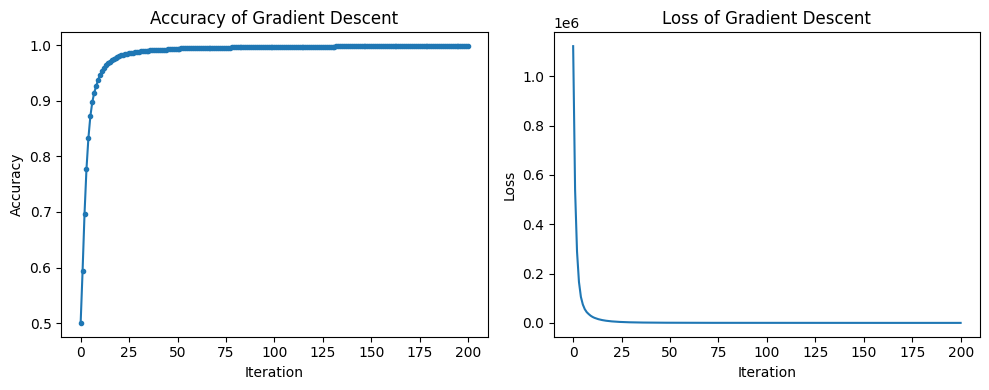

In [17]:
import matplotlib.pyplot as plt
print("accuracy: {:.3f} ---- loss: {:.3f}".format(accuracy_list_rbcgd[-1], loss_rbcgd[-1]))

# create a figure with two subplots
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))

# plot the first graph on the left subplot
axs[0].set_title("Accuracy of Gradient Descent")
axs[0].plot(accuracy_list_rbcgd, marker='.')
axs[0].set_xlabel("Iteration")
axs[0].set_ylabel("Accuracy")

# plot the second graph on the right subplot
axs[1].set_title("Loss of Gradient Descent")
axs[1].plot(loss_rbcgd)
axs[1].set_xlabel("Iteration")
axs[1].set_ylabel("Loss")

# adjust the spacing between the subplots
plt.tight_layout()

# display the plot
plt.show()


##Cyclic BCGD

In [18]:
y_unlabeled_cbcd = np.copy(y[unlabeled_indices]).astype(np.float64)
y_labeled_cbcd = np.copy(y[labeled_indices]).astype(np.float64)

In [19]:
# Initialize the estimated y and the stepsize
accuracy_list_cbcd = []
losses_cbcd = []
stepsize = 0.0001
BATCH_SIZE = 180

# Initialize a vector for values of the objective function
loss_cbcd = []

# Implementation of Cyclic BCGD
stop_condition = False

ITERATION = 0 
batch_index = 0
num_batches = int(np.ceil(len(y_unlabeled_cbcd) / BATCH_SIZE))

while ITERATION <= NUM_ITER:
    ITERATION += 1
    stop_condition = False

    # Check the stop condition
    if stop_condition:
        break

    # Compute objective function for estimated y
    loss_cbcd.append(loss_fast(y_labeled_cbcd, y_unlabeled_cbcd))
    accuracy_list_cbcd.append(accuracy(y_unlabeled_cbcd))

    for b in range(num_batches):
        # Choosing next batch
        batch_indices = range(b * BATCH_SIZE, min((b + 1) * BATCH_SIZE, len(y_unlabeled_cbcd)))
        batch_size = len(batch_indices)

        # Calculate gradients for the entire batch
        grads = [gradient_fast_new_weights_iter(y_unlabeled_cbcd, i) for i in batch_indices]

        # Update the estimated y for the entire batch
        for i, grad in zip(batch_indices, grads):
            y_unlabeled_cbcd[i] = y_unlabeled_cbcd[i] - stepsize * grad

        # Rotate the indices to get the next batch
        batch_indices = np.roll(batch_indices, -batch_size)

    print("iteration: {} --- accuracy: {:.3f} ---- loss: {:.3f}".format(ITERATION, accuracy_list_cbcd[-1], loss_cbcd[-1]))

accuracy: 0.500 ---- loss: 1122499.743
accuracy: 0.500 ---- loss: 995770.403
accuracy: 0.500 ---- loss: 885831.216
accuracy: 0.500 ---- loss: 790303.229
accuracy: 0.500 ---- loss: 707157.784
accuracy: 0.500 ---- loss: 634663.573
accuracy: 0.500 ---- loss: 571341.855
accuracy: 0.500 ---- loss: 515928.553
accuracy: 0.500 ---- loss: 467342.154
accuracy: 0.500 ---- loss: 424656.520
accuracy: 0.500 ---- loss: 387077.828
accuracy: 0.500 ---- loss: 353925.024
accuracy: 0.500 ---- loss: 324613.232
accuracy: 0.500 ---- loss: 298639.659
accuracy: 0.500 ---- loss: 275571.629
accuracy: 0.500 ---- loss: 255036.404
accuracy: 0.530 ---- loss: 236712.527
accuracy: 0.562 ---- loss: 220322.450
accuracy: 0.588 ---- loss: 205626.261
accuracy: 0.613 ---- loss: 192416.326
accuracy: 0.637 ---- loss: 180512.728
accuracy: 0.659 ---- loss: 169759.371
accuracy: 0.677 ---- loss: 160020.647
accuracy: 0.693 ---- loss: 151178.591
accuracy: 0.709 ---- loss: 143130.448
accuracy: 0.726 ---- loss: 135786.586
accuracy: 0

accuracy: 0.880 ---- loss: 55428.962


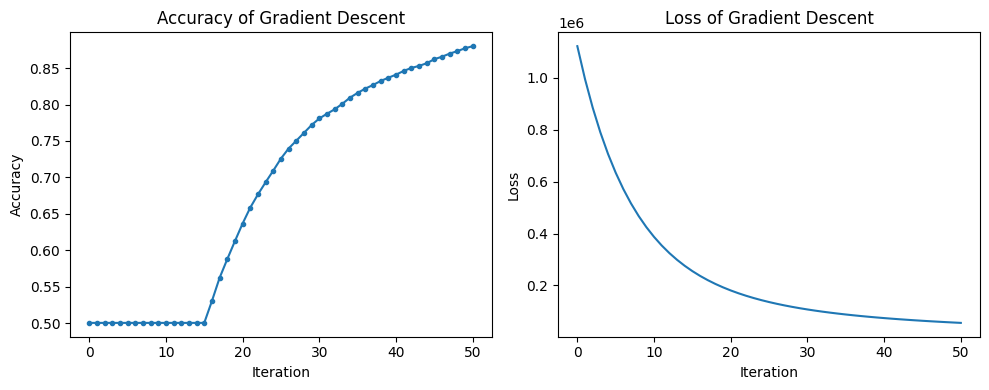

In [20]:
import matplotlib.pyplot as plt
print("accuracy: {:.3f} ---- loss: {:.3f}".format(accuracy_list_cbcd[-1], loss_cbcd[-1]))

# create a figure with two subplots
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))

# plot the first graph on the left subplot
axs[0].set_title("Accuracy of Gradient Descent")
axs[0].plot(accuracy_list_cbcd, marker='.')
axs[0].set_xlabel("Iteration")
axs[0].set_ylabel("Accuracy")

# plot the second graph on the right subplot
axs[1].set_title("Loss of Gradient Descent")
axs[1].plot(loss_cbcd)
axs[1].set_xlabel("Iteration")
axs[1].set_ylabel("Loss")

# adjust the spacing between the subplots
plt.tight_layout()

# display the plot
plt.show()


##BCGD with Gauss-Southwell

In [28]:
y_unlabeled_gs = np.copy(y[unlabeled_indices]).astype(np.float64)
y_labeled_gs = np.copy(y[labeled_indices]).astype(np.float64)

In [29]:
# Initialize the estimated y and the stepsize
accuracy_list_gs = []
losses_gs = []
stepsize = 0.0001

# Initialize a vector for values of the objective function
loss_gs = []

# Implementation of Randomized BCGD
stop_condition = False
ITERATION = 0 

#Get all the gradients
previous_grad_gs = []
for i in range(len(y_unlabeled_gs)):
  previous_grad_gs.append(gradient_fast_new_weights_iter(y_unlabeled_gs, i))


while ITERATION <= NUM_ITER:
  ITERATION+=1
  stop_condition = False

  # Check the stop condition
  if (stop_condition):
    break

  # Compute objective function for estimated y
  loss_gs.append(loss_fast(y_labeled_gs, y_unlabeled_gs))
  accuracy_list_gs.append(accuracy(y_unlabeled_gs))

  for i in range(len(y_unlabeled_gs)):
      
    #Get the highest gradient index
    max_index = np.argmax(np.abs(previous_grad_gs))

    #Calculate gradient at that point
    grad = gradient_fast_new_weights_iter(y_unlabeled_gs, max_index)

    # Stopping condition
    if(abs(grad) < 0.00001):
      stop_condition = True
      print("stopped condition reached")

    # Update the estimated y
    y_unlabeled_gs[max_index] = y_unlabeled_gs[max_index] - 0.001 * grad

    # Update gradient list
    previous_grad_gs[max_index] = grad

  print("iteration: {} --- accuracy: {:.3f} ---- loss: {:.3f}".format(ITERATION,accuracy_list_gs[-1], loss_gs[-1]))

iteration: 1 --- accuracy: 0.500 ---- loss: 1122499.743
iteration: 2 --- accuracy: 0.794 ---- loss: 221903.391
iteration: 3 --- accuracy: 0.883 ---- loss: 100582.202
iteration: 4 --- accuracy: 0.935 ---- loss: 47487.529
iteration: 5 --- accuracy: 0.961 ---- loss: 25035.622
iteration: 6 --- accuracy: 0.972 ---- loss: 17846.648
iteration: 7 --- accuracy: 0.982 ---- loss: 12388.333
iteration: 8 --- accuracy: 0.988 ---- loss: 9188.802
iteration: 9 --- accuracy: 0.991 ---- loss: 7736.740
iteration: 10 --- accuracy: 0.993 ---- loss: 6588.773
iteration: 11 --- accuracy: 0.995 ---- loss: 5675.263
iteration: 12 --- accuracy: 0.996 ---- loss: 4894.791
iteration: 13 --- accuracy: 0.996 ---- loss: 4206.990
iteration: 14 --- accuracy: 0.997 ---- loss: 3688.252
iteration: 15 --- accuracy: 0.997 ---- loss: 3321.074
iteration: 16 --- accuracy: 0.998 ---- loss: 2960.454
iteration: 17 --- accuracy: 0.998 ---- loss: 2684.855
iteration: 18 --- accuracy: 0.998 ---- loss: 2464.277
iteration: 19 --- accuracy

accuracy: 1.000 ---- loss: 388.107


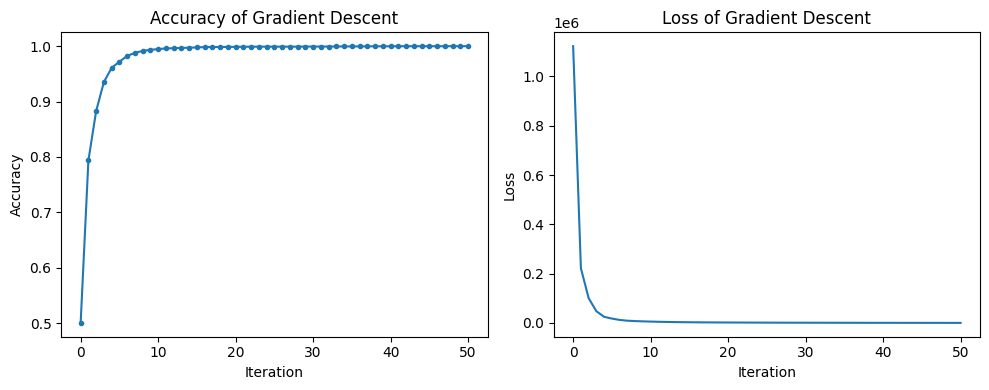

In [23]:
import matplotlib.pyplot as plt
print("accuracy: {:.3f} ---- loss: {:.3f}".format(accuracy_list_gs[-1], loss_gs[-1]))

# create a figure with two subplots
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))

# plot the first graph on the left subplot
axs[0].set_title("Accuracy of Gradient Descent")
axs[0].plot(accuracy_list_gs, marker='.')
axs[0].set_xlabel("Iteration")
axs[0].set_ylabel("Accuracy")

# plot the second graph on the right subplot
axs[1].set_title("Loss of Gradient Descent")
axs[1].plot(loss_gs)
axs[1].set_xlabel("Iteration")
axs[1].set_ylabel("Loss")

# adjust the spacing between the subplots
plt.tight_layout()

# display the plot
plt.show()

##General Comparison

In [24]:
print("accuracy Standard GD': {:.3f} ---- loss: {:.3f}".format(accuracy_list_gd[-1], loss_gd[-1]))
print("accuracy Randomized GD: {:.3f} ---- loss: {:.3f}".format(accuracy_list_rbcgd[-1], loss_rbcgd[-1]))
print("accuracy Cyclic GD: {:.3f} ---- loss: {:.3f}".format(accuracy_list_cbcd[-1], loss_cbcd[-1]))
print("accuracy Gauss-Southwell GD: {:.3f} ---- loss: {:.3f}".format(accuracy_list_gs[-1], loss_gs[-1]))

accuracy Standard GD': 0.999 ---- loss: 21.852
accuracy Randomized GD: 0.999 ---- loss: 23.178
accuracy Cyclic GD: 0.880 ---- loss: 55428.962
accuracy Gauss-Southwell GD: 1.000 ---- loss: 388.107


<ipython-input-31-338b8827803b>:2: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-darkgrid')


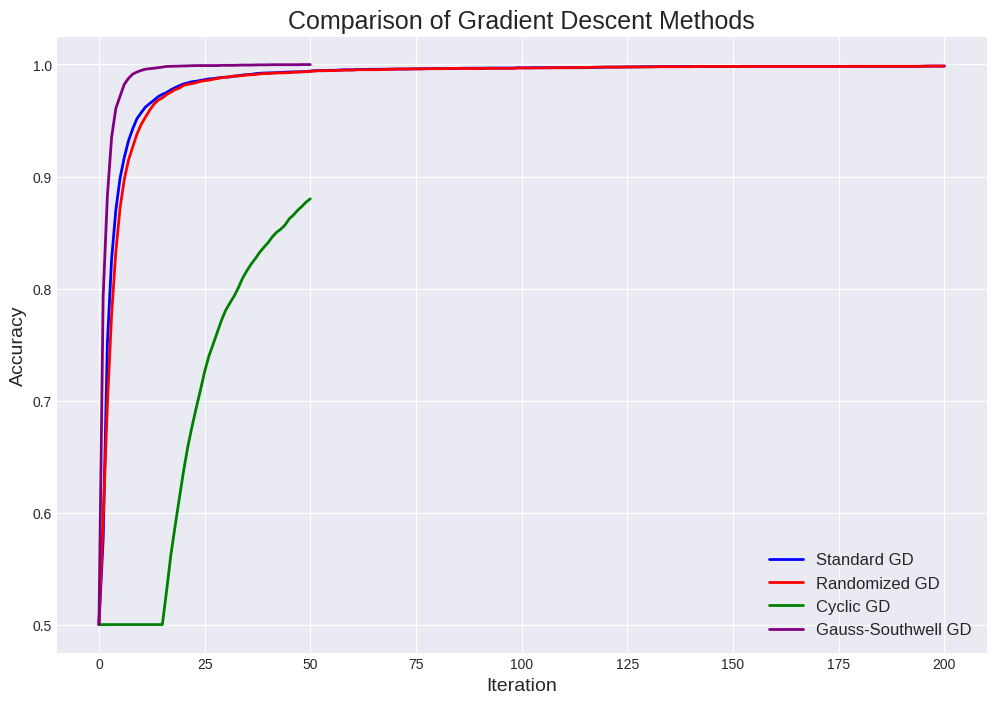

In [31]:
# Set up plot style
plt.style.use('seaborn-darkgrid')

# Plot the functions
plt.figure(figsize=(12, 8))
plt.plot(accuracy_list_gd, linewidth=2, label='Standard GD', color='blue')
plt.plot(accuracy_list_rbcgd, linewidth=2, label='Randomized GD', color='red')
plt.plot(accuracy_list_cbcd, linewidth=2, label='Cyclic GD', color='green')
plt.plot(accuracy_list_gs, linewidth=2, label='Gauss-Southwell GD', color='purple')

# Add axis labels and title
plt.xlabel('Iteration', fontsize=14)
plt.ylabel('Accuracy', fontsize=14)
plt.title('Comparison of Gradient Descent Methods', fontsize=18)

# Add legend and adjust its properties
plt.legend(loc='lower right', prop={'size': 12})

# Save and show the plot
plt.savefig('gd_comparison.png', dpi=300, bbox_inches='tight')
plt.show()


Plot champ gradient method

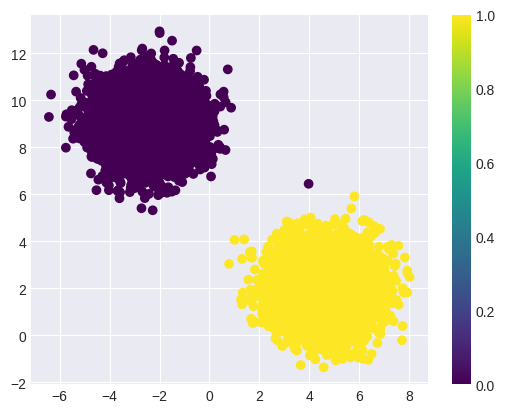

In [32]:
champ_model = y_unlabeled_gs

def convert_probs(predicted):
  predicted_list = []
  for i in predicted:
    if i <= 0.5:
      predicted_list.append(0)
    else:
      predicted_list.append(1)   
  return predicted_list

champ_model_results = convert_probs(champ_model)

y_new = np.zeros_like(y)
y_new[labeled_indices] = y[labeled_indices]
y_new[unlabeled_indices] = champ_model_results

plt.scatter(X[:, 0], X[:, 1], c=y_new, cmap='viridis')
plt.colorbar()
plt.show()